# Tutorial 9

In [2]:
import numpy as np
from numpy import kron
import matplotlib.pyplot as plt

In [3]:
lbd = 0.5

In [4]:
h1 = 0.6
h2 = 0
h3 = 0
hi = [h1, h2, h3]
J12 = -1.1
J13 = -2.1
J23 = -3.8
Ji = [J12, J13, J23]

In [5]:
Sx = np.array([[0., 1.], [1., 0.]])
Sz = np.array([[1., 0.],[0.,-1.]])
one = np.eye(2)

In [6]:
Sz_1 = kron(Sz, kron(one, one))
Sz_2 = kron(one, kron(Sz, one))
Sz_3 = kron(one, kron(one, Sz))
Sz_i = [Sz_1, Sz_2, Sz_3]

In [7]:
Sx_1 = kron(Sx, kron(one, one))
Sx_2 = kron(one, kron(Sx, one))
Sx_3 = kron(one, kron(one, Sx))
Sx_i = [Sx_1, Sx_2, Sx_3]

In [8]:
H0 = -np.sum(Sx_i, axis=0)

In [9]:
H0

array([[-0., -1., -1., -0., -1., -0., -0., -0.],
       [-1., -0., -0., -1., -0., -1., -0., -0.],
       [-1., -0., -0., -1., -0., -0., -1., -0.],
       [-0., -1., -1., -0., -0., -0., -0., -1.],
       [-1., -0., -0., -0., -0., -1., -1., -0.],
       [-0., -1., -0., -0., -1., -0., -0., -1.],
       [-0., -0., -1., -0., -1., -0., -0., -1.],
       [-0., -0., -0., -1., -0., -1., -1., -0.]])

In [10]:
H1 = -np.sum(([J12*Sz_1*Sz_2, J13*Sz_1*Sz_3, J23*Sz_2*Sz_3]), axis=0) - np.sum([(lambda i: hi[i]*Sz_i[i])(i) for i in range(3)], axis=0)

In [11]:
H1

array([[ 6.40000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -5.40000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -3.40000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -3.33066907e-16, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  1.20000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -2.20000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.000000

In [12]:
H = (1-lbd)*H0 + lbd*H1

In [13]:
H

array([[ 3.20000000e+00, -5.00000000e-01, -5.00000000e-01,
        -0.00000000e+00, -5.00000000e-01, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-5.00000000e-01, -2.70000000e+00, -0.00000000e+00,
        -5.00000000e-01, -0.00000000e+00, -5.00000000e-01,
        -0.00000000e+00, -0.00000000e+00],
       [-5.00000000e-01, -0.00000000e+00, -1.70000000e+00,
        -5.00000000e-01, -0.00000000e+00, -0.00000000e+00,
        -5.00000000e-01, -0.00000000e+00],
       [-0.00000000e+00, -5.00000000e-01, -5.00000000e-01,
        -1.66533454e-16, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -5.00000000e-01],
       [-5.00000000e-01, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  6.00000000e-01, -5.00000000e-01,
        -5.00000000e-01, -0.00000000e+00],
       [-0.00000000e+00, -5.00000000e-01, -0.00000000e+00,
        -0.00000000e+00, -5.00000000e-01, -1.10000000e+00,
        -0.00000000e+00, -5.00000000e-01],
       [-0.00000000e+00, -0.000000

In [14]:
energies = np.linalg.eigvals(H)

In [15]:
energies.sort()

In [16]:
delta_e = energies[1] - energies[0]

In [17]:
delta_e

0.45021335289100195

In [18]:
eigvecs = np.linalg.eig(H)

In [19]:
eigvecs

(array([ 3.38712257,  3.96202241,  0.7129335 ,  0.1414105 , -3.00219923,
        -2.55198587, -1.55516268, -1.09414121]),
 array([[ 0.97176651,  0.05312026,  0.18508474, -0.06963576,  0.09251386,
         -0.03419451, -0.06211006,  0.01252368],
        [-0.08296801, -0.02138435,  0.00111101, -0.15696856,  0.90754929,
          0.25898121,  0.01616228, -0.27756164],
        [-0.09903214, -0.02368548, -0.01700664, -0.24536532,  0.1678597 ,
         -0.52445329, -0.76925021,  0.18483573],
        [ 0.01658089,  0.12935497,  0.05046754,  0.94348958,  0.18662067,
         -0.06492154, -0.22603276, -0.0118287 ],
        [-0.18167875, -0.03588782,  0.93653173, -0.02364055,  0.07216976,
         -0.1279006 ,  0.16240108,  0.20028278],
        [ 0.02172546,  0.10245084, -0.24313588,  0.01817042,  0.26938685,
          0.02245029,  0.25113645,  0.89075462],
        [ 0.01922991,  0.0857402 , -0.15348047,  0.02978273,  0.15803901,
         -0.79453755,  0.5109751 , -0.22466368],
        [ 0.06967

In [20]:
GS = eigvecs[1][:, np.argmin(eigvecs[0])]

In [21]:
GS

array([0.09251386, 0.90754929, 0.1678597 , 0.18662067, 0.07216976,
       0.26938685, 0.15803901, 0.04513588])

In [22]:
lbd_tab = np.arange(0,1,0.0001)
delta_e_tab = []
sz_i_exp_tab = [[],[],[]]
for lbd in lbd_tab:
    # Our hermitian matrix
    H = (1-lbd)*H0 + lbd*H1
    # Eigenenergies
    energies = np.linalg.eigvals(H)
    energies.sort()
    # Band gap as difference between two smalles eigenenergies
    delta_e = energies[1] - energies[0]
    eigvecs = np.linalg.eig(H)
    #Ground state - corresponding to the lowest eigenenergy
    GS = eigvecs[1][:, np.argmin(eigvecs[0])]
    sz_1_exp = float(np.dot(GS.reshape(1, -1), np.dot(Sz_1, GS)))
    sz_2_exp = float(np.dot(GS.reshape(1, -1), np.dot(Sz_2, GS)))
    sz_3_exp = float(np.dot(GS.reshape(1, -1), np.dot(Sz_3, GS)))

    sz_i_exp_tab[0].append(sz_1_exp)
    sz_i_exp_tab[1].append(sz_2_exp)
    sz_i_exp_tab[2].append(sz_3_exp)
    delta_e_tab.append(delta_e)

Text(0, 0.5, '$\\Delta E$')

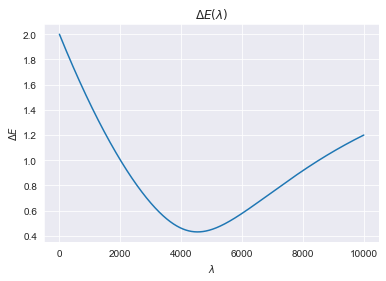

In [23]:
plt.plot(delta_e_tab)
plt.title("$\Delta E(\lambda)$")
plt.xlabel("$\lambda$")
plt.ylabel("$\Delta E$")

In [24]:
T_aqc = np.sum([(lambda i: 1/(delta_e_tab[i]**2))(i) for i in range(len(delta_e_tab))])/len(delta_e_tab)

Here I don't know if I didn't fail something, as it scales with subdivisions of lambda interval

In [25]:
print("Optimal running time of the adiabatic evolution is {:.3f} s".format(T_aqc))

Optimal running time of the adiabatic evolution is 2.075 s


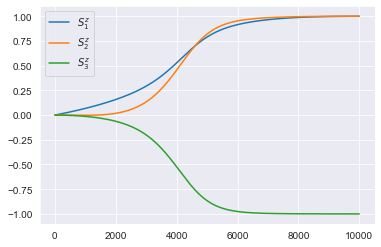

In [26]:
plt.plot(sz_i_exp_tab[0], label="$S^z_1$")
plt.plot(sz_i_exp_tab[1], label="$S^z_2$")
plt.plot(sz_i_exp_tab[2], label="$S^z_3$")
plt.legend()